In [37]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
%matplotlib inline

In [38]:
size=100
gamma = 0.95
X = sps.norm.rvs(size=100, loc=0, scale=1)

### Строим доверительные интервалы:
## (c) Для $a$ при неизвестном $\sigma^2$:
# $\left(\overline{X}-\sqrt{\frac{\overline S^2}{n-1}}z_{\frac{1+\gamma}{2}}, \overline{X}+\sqrt{\frac{\overline S^2}{n-1}}z_{\frac{1+\gamma}{2}} \right)$, где $z_{\frac{1+\gamma}{2}}$ - квантиль уровня ${\frac{1+\gamma}{2}}$ из
# распределения Стьюдента $T_{n-1}$

In [39]:
quant = [sps.t.ppf((1+gamma)*1./2, i - 1) for i in range(2, size, 1)]

left = [X[:i].mean()-math.sqrt(((X[:i]**2).mean()-(X[:i].mean())**2)/(i-1))*quant[i-2] 
        for i in range(2, size, 1)]
right = [X[:i].mean()+math.sqrt(((X[:i]**2).mean()-(X[:i].mean())**2)/(i-1))*quant[i-2] 
        for i in range(2, size, 1)]

## Построим график:

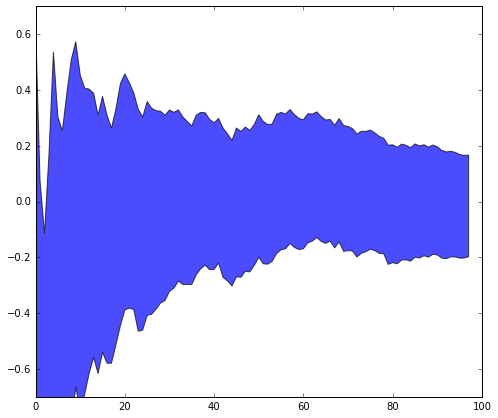

In [40]:
plt.figure(figsize=(8, 7))
plt.ylim(-0.7, 0.7)
plt.matplotlib.pyplot.fill_between(range(size-2), left, right, facecolor='blue', 
                                   alpha = 0.7)

## (d) Для  $\sigma^2$ при неизвестном $a$ :
# $\left(\frac{(n-1)\overline S^2}{z_{\frac{1+\gamma}{2}}}, \frac{(n-1)\overline S^2}{z_{\frac{1-\gamma}{2}}}\right)$, где $z_{\frac{1+\gamma}{2}}$ - квантиль уровня $\frac{1+\gamma}{2}$ из
# распределения $\chi^2_{n-1}$

In [41]:
quant_l = [sps.chi2.ppf((1+gamma)/2, i - 1) for i in range(2, size, 1)]
quant_r = [sps.chi2.ppf((1-gamma)/2, i - 1) for i in range(2, size, 1)]

left = [((X[:i]**2).mean()-(X[:i].mean())**2)*(i-1)/quant_l[i-2] for i in range(2, size, 1)]
right = [((X[:i]**2).mean()-(X[:i].mean())**2)*(i-1)/quant_r[i-2] for i in range(2, size, 1)]

## Построим график:

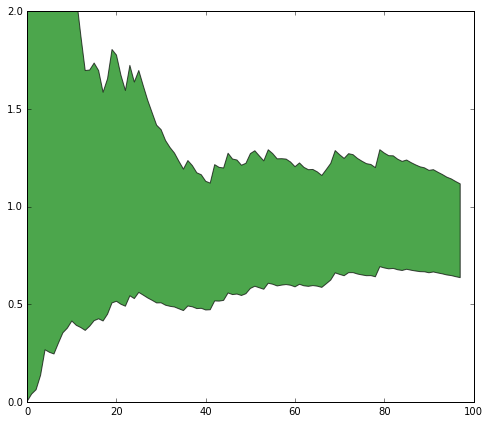

In [42]:
plt.figure(figsize=(8, 7))
plt.ylim(0, 2)
plt.matplotlib.pyplot.fill_between(range(size-2), left, right, facecolor='green', alpha = 0.7)

## (a) Для $a$ при известном $\sigma^2$ :
# $\left(\overline{X}-\frac{\sigma}{\sqrt{n}}z_{\frac{1+\gamma}{2}}, \overline{X}+\frac{\sigma}{\sqrt{n}}z_{\frac{1+\gamma}{2}} \right)$, где $z_{\frac{1+\gamma}{2}}$ - квантиль уровня $\frac{1+\gamma}{2}$ из
# стандартного нормального распределения 

In [43]:
quant = sps.norm.ppf((1.+gamma)/2, loc=0, scale=1)
print(quant)

left = [X[:i].mean() - quant/math.sqrt(i) for i in range(1, size, 1)]
right = [X[:i].mean() + quant/math.sqrt(i) for i in range(1, size, 1)]

1.95996398454


## Построим график:

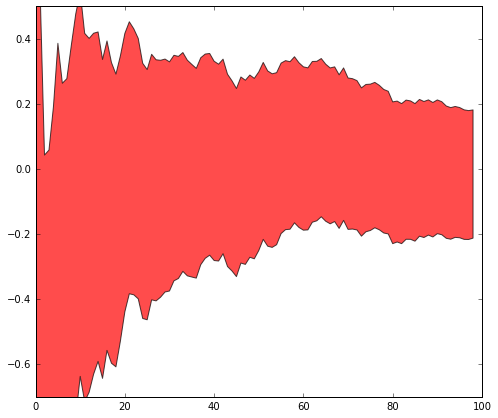

In [44]:
plt.figure(figsize=(8, 7))
plt.ylim(-0.7, 0.5)
plt.matplotlib.pyplot.fill_between(range(size-1), left, right, facecolor='red', 
                                   alpha = 0.7)

## (b) Для  $\sigma^2$ при известном $a$ :
# $ \left(\frac{\sum_{i = 1}^{n}{(X_i - \mu)}^{2}}{z_{\frac{1 + \gamma}{2}}} , \frac{\sum_{i = 1}^{n}{(X_i - \mu)}^{2}}{z_{\frac{1 - \gamma}{2}}}\right) $, где  $z_{\frac{1 + \gamma}{2}}$, $z_{\frac{1 - \gamma}{2}}$ квантили уровней $\frac{1 + \gamma}{2}$, $\frac{1 - \gamma}{2}$ соответственно из распределения ${\chi^{2}_{n}}$

In [45]:
quant_l = [sps.chi2.ppf((1+gamma)/2, i) for i in range(1, size, 1)]
quant_r = [sps.chi2.ppf((1-gamma)/2, i) for i in range(1, size, 1)]

left = [sum(X[:i]**2)/quant_l[i-1] for i in range(1, size, 1)]
right = [sum(X[:i]**2)/quant_r[i-1] for i in range(1, size, 1)]

## Построим график

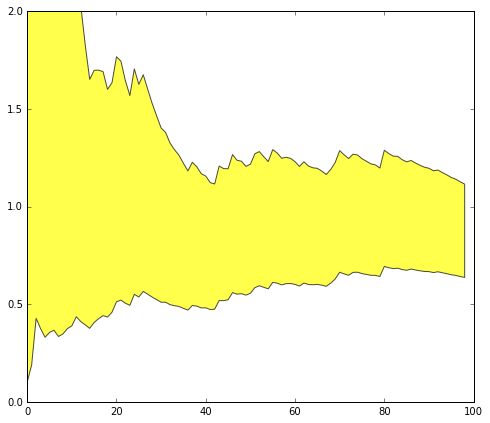

In [46]:
plt.figure(figsize=(8, 7))
plt.ylim(0, 2)
plt.matplotlib.pyplot.fill_between(range(size-1), left, right, facecolor='yellow', 
                                   alpha=0.7)

## Вывод : доверительные интервалы для мат ожидания с известной дисперсией и для дисперсии с известным матожиданием получаются лучше, чем когда матожидание и дисперсия не известны

## (e) Доверительная область для $(a, \sigma^2)$:
# $\left(0, \frac{ns^2}{z_{1 - \sqrt{\gamma}}}\right) \times \left(\overline{X} - \sqrt{\frac{s^2z_{\sqrt{\gamma}}}{z_{1 - \sqrt{\gamma}}}}, \overline{X} + \sqrt{\frac{s^2z_{\sqrt{\gamma}}}{z_{1 - \sqrt{\gamma}}}}\right)$, где $z$ - квантили распределения $\mathcal{X}_{n - 1}^2$

In [52]:
# считаем интервалы
quant1 = [sps.chi2.ppf(1-math.sqrt(gamma), i - 1) for i in range(2, size, 1)]
quant2 = [sps.chi2.ppf(math.sqrt(gamma), i - 1) for i in range(2, size, 1)]

left_a = [0 for i in range(2, size, 1)]
right_a = [i*((X[:i]**2).mean()-(X[:i].mean())**2)*1./quant1[i-2] for i in range(2, size, 1)]

left_sigma = [X[:i].mean()-math.sqrt(((X[:i]**2).mean()-(X[:i].mean())**2)*quant2[i-2]/quant1[i-2]) 
              for i in range(2, size, 1)]
right_sigma = [X[:i].mean()+math.sqrt(((X[:i]**2).mean()-(X[:i].mean())**2)*quant2[i-2]/quant1[i-2]) 
               for i in range(2, size, 1)]

## Строим 3D график:

In [58]:
axis = []
for i in range(size-2):
    # координаты прямоугольника
    axis_Y = [left_a[i], left_a[i], right_a[i], right_a[i]]
    axis_X = [left_sigma[i], right_sigma[i], right_sigma[i], left_sigma[i]]
    axis_Z = [i, i, i, i]
    axis.append(list(zip(axis_X, axis_Y, axis_Z)))

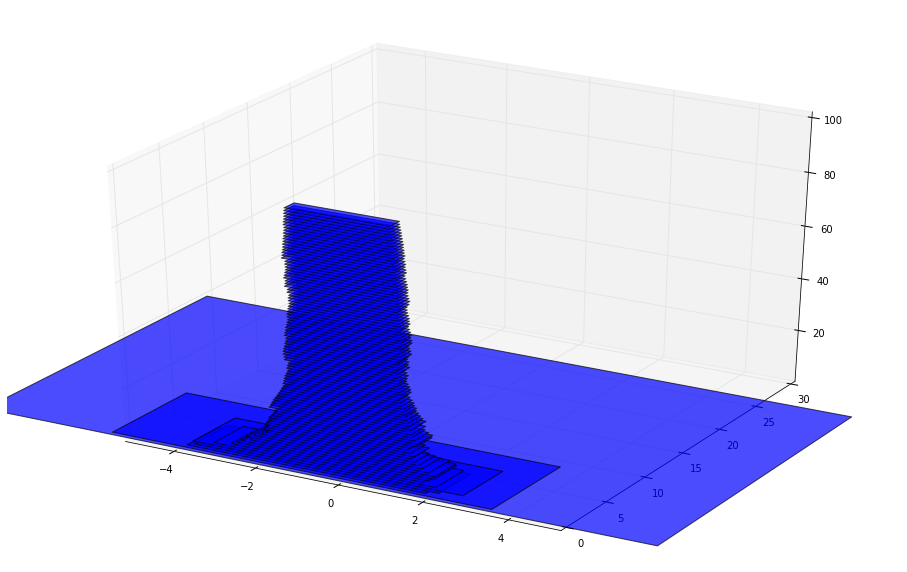

In [65]:
fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')

ax.add_collection3d(Poly3DCollection(axis, alpha=0.7))
ax.set_xlim3d(-5, 5)
ax.set_zlim3d(2, size)
ax.set_ylim3d(0, 30)

plt.show()

## Видно, что с ростом элементов выборки доверительная область очень сильно уменьшается